# CascadeTabNet Demo Notebook
[![PWC](https://img.shields.io/endpoint.svg?url=https://paperswithcode.com/badge/cascadetabnet-an-approach-for-end-to-end/table-detection-on-icdar2013-1)](https://paperswithcode.com/sota/table-detection-on-icdar2013-1?p=cascadetabnet-an-approach-for-end-to-end)
[![PWC](https://img.shields.io/badge/PyTorch-v1.4-blue)](https://pytorch.org/)
[![PWC](https://img.shields.io/badge/%20mmdetection%20-v1.2-blue)](https://github.com/open-mmlab/mmdetection)

> **CascadeTabNet: An approach for end to end table detection and structure recognition from image-based documents**<br>
> [Devashish Prasad](https://github.com/DevashishPrasad),
> [Ayan Gadpal](https://github.com/ayangadpal),
> [Kshitij Kapadni](https://github.com/kshitijkapadni),
> [Manish Visave](https://github.com/ManishDV),
> <br>
> [Preprint Link of Paper](https://arxiv.org/abs/2004.12629)<br>
> <a href="results.pdf">Supplementary file</a> <br>
> The paper has been accepted at [CVPR 2020 Workshop on Text and Documents in the Deep Learning Era](https://cvpr2020text.wordpress.com/)<br>
> [Code Link](https://github.com/DevashishPrasad/CascadeTabNet)
<img align="right" src="imgs/CVPR Teaser.gif" />

## 1. Install all the prerequisite
This will take a while, Remember to **Restart Runtime** after this step is done 

In [ ]:
!pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q mmcv terminaltables
!git clone --branch v1.2.0 'https://github.com/open-mmlab/mmdetection.git'
%cd "mmdetection"
!pip install -r "/content/mmdetection/requirements/optional.txt"
!python setup.py install
!python setup.py develop
!pip install -r {"requirements.txt"}
!pip install pillow==6.2.1 
!pip install mmcv==0.4.3
%cd "/content"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
fatal: destination path 'mmdetection' already exists and is not an empty directory.
/content/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
running install
running bdist_egg
running egg_info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
adding license file 'LICENSE'
writing manifest file 'mmdet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying mmdet/version.py -> build/lib.linux-x86_64-3.7/mmdet
running build_ext
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mmdet
creating build/bdist.linux-x86_64/egg/

## 2. Clone the Repository 
We will be using "ICDAR 19 (Track B2 Modern) table structure recognition" for demo

In [ ]:
!git clone https://github.com/DevashishPrasad/CascadeTabNet.git

Cloning into 'CascadeTabNet'...
remote: Enumerating objects: 675, done.
remote: Total 675 (delta 0), reused 0 (delta 0), pack-reused 675
Receiving objects: 100% (675/675), 16.55 MiB | 17.17 MiB/s, done.
Resolving deltas: 100% (328/328), done.


## 3. Download the Pretrained Model



In [ ]:
!gdown "https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT"

Downloading...
From: https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT
To: /content/epoch_36.pth
100% 664M/664M [00:15<00:00, 42.9MB/s]


## 4. Run the Predictions

In [ ]:
pip install pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (104 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
# import module
from pdf2image import convert_from_path
 
 
# Store Pdf with convert_from_path function
images = convert_from_path('Extracted pages from keppel-corporation m-limited-annual-report-2018.pdf')
 
for i in range(len(images)):
   
      # Save pages as images in the pdf
    images[i].save('page'+ str(i) +'.jpg', 'JPEG')

In [ ]:
ls

 CascadeTabNet/
 epoch_36.pth
'Extracted pages from keppel-corporation m-limited-annual-report-2018.pdf'
 mmdetection/
 page0.jpg
 page1.jpg
 page2.jpg
 sample_data/


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


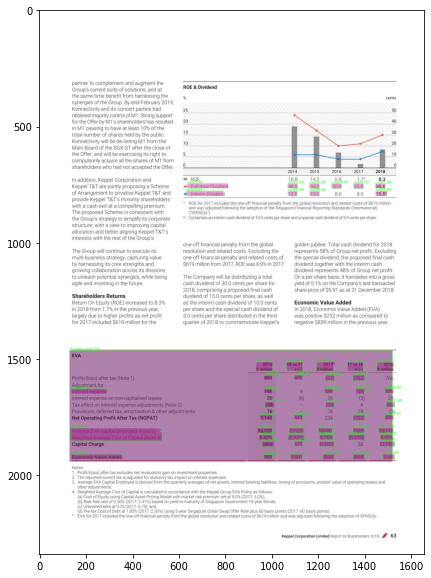

In [ ]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
# Load model
config_file = '/content/CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file = '/content/epoch_36.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# Test a single image 
img = "page0.jpg"

# Run Inference
result = inference_detector(model, img)

# Visualization results
show_result_pyplot(img, result,('Bordered', 'cell', 'Borderless'), score_thr=0.85)

**Note :** If you are getting "no module name mmdet" error, Please Restart the runtime by pressing "Crtl+M" OR going to the runtime (5th option, top left) and selecting Restart Runtime.

After this, use TSR postprocessing for best result

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


<class 'tuple'>
([array([], shape=(0, 5), dtype=float32), array([[1.04077930e+03, 1.67647375e+03, 1.10932544e+03, 1.71576062e+03,
        9.95592415e-01],
       [1.30077539e+03, 1.67692786e+03, 1.36966724e+03, 1.71581909e+03,
        9.94419873e-01],
       [1.42807129e+03, 1.67738660e+03, 1.49963574e+03, 1.71475623e+03,
        9.95178938e-01],
       [1.04961316e+03, 2.04769995e+03, 1.11502356e+03, 2.07025732e+03,
        9.97980177e-01],
       [9.07992554e+02, 1.67683948e+03, 9.79841248e+02, 1.71507642e+03,
        9.97163475e-01],
       [1.16855774e+03, 1.67626917e+03, 1.24425171e+03, 1.71577954e+03,
        9.94414330e-01],
       [1.04965320e+03, 1.82714148e+03, 1.11355530e+03, 1.85083325e+03,
        9.96384025e-01],
       [1.04950708e+03, 1.89010388e+03, 1.11370227e+03, 1.91283752e+03,
        9.98162448e-01],
       [1.45644568e+03, 2.10933813e+03, 1.50487903e+03, 2.13176514e+03,
        9.95816648e-01],
       [1.31752429e+03, 2.04649878e+03, 1.36770862e+03, 2.06886108e+0

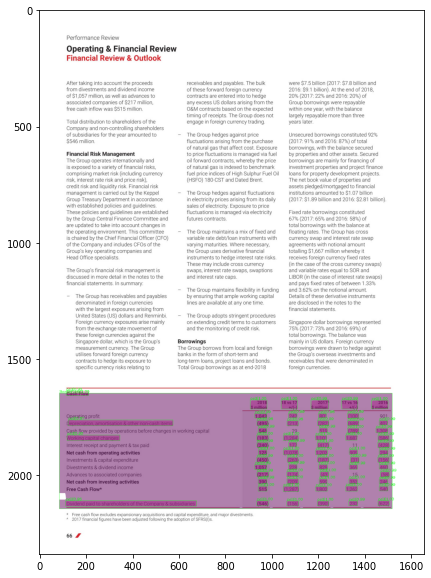

In [ ]:
# Test a single image 
img = "page1.jpg"

# Run Inference
result = inference_detector(model, img)
print(type(result))
print(result)

# Visualization results
show_result_pyplot(img, result,('Bordered', 'cell', 'Borderless'), score_thr=0.85)

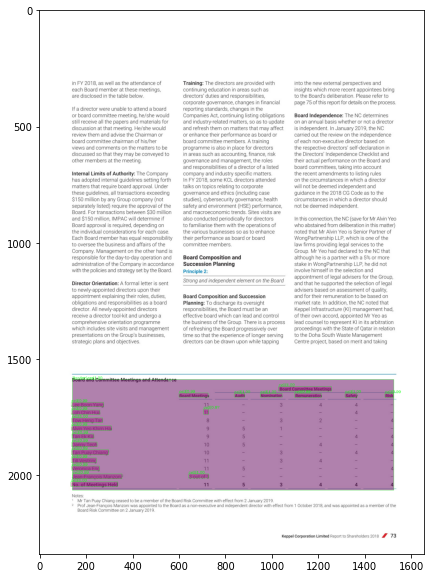

In [ ]:
# Test a single image 
img = "page2.jpg"

# Run Inference
result = inference_detector(model, img)

# Visualization results
show_result_pyplot(img, result,('Bordered', 'cell', 'Borderless'), score_thr=0.85)

In [ ]:
pip install camelot-py[cv]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install camelot-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import camelot
tables = camelot.read_pdf('Extracted pages from keppel-corporation m-limited-annual-report-2018.pdf')
tables

ImportError: ignored